In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1
from fastf1 import plotting

# Enable cache
fastf1.Cache.enable_cache('../data/raw')

# Load race session
session = fastf1.get_session(2024, 'Monaco', 'R')
session.load()

laps = session.laps
print(f"✅ Loaded {len(laps)} laps from Monaco GP 2024")
laps.head()


core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

✅ Loaded 1237 laps from Monaco GP 2024


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:36:02.319000,LEC,16,0 days 00:40:56.330000,1.0,1.0,NaT,0 days 00:56:45.433000,NaT,0 days 00:00:46.389000,...,True,Ferrari,0 days 00:55:05.680000,2024-05-26 13:03:11.069,1254,1.0,False,,False,False
1,0 days 01:39:00.140000,LEC,16,NaT,2.0,2.0,0 days 01:36:03.182000,NaT,0 days 00:00:26.854000,0 days 00:00:41.743000,...,True,Ferrari,0 days 01:35:54.733000,2024-05-26 13:44:00.122,14,1.0,False,,False,False
2,0 days 01:40:24.764000,LEC,16,0 days 00:01:24.624000,3.0,2.0,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,...,True,Ferrari,0 days 01:39:00.140000,2024-05-26 13:47:05.529,1,1.0,False,,False,True
3,0 days 01:41:47.389000,LEC,16,0 days 00:01:22.625000,4.0,2.0,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,...,True,Ferrari,0 days 01:40:24.764000,2024-05-26 13:48:30.153,1,1.0,False,,False,True
4,0 days 01:43:09.184000,LEC,16,0 days 00:01:21.795000,5.0,2.0,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,...,True,Ferrari,0 days 01:41:47.389000,2024-05-26 13:49:52.778,1,1.0,False,,False,True


In [2]:
print("Columns:", laps.columns.tolist())
print("\nDrivers:", laps['Driver'].unique())
print("\nTire Compounds Used:", laps['Compound'].unique())

laps.describe()[['LapNumber', 'LapTime', 'SpeedI1', 'SpeedFL', 'Sector1Time', 'Sector2Time', 'Sector3Time']]

Columns: ['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate']

Drivers: ['LEC' 'PIA' 'SAI' 'NOR' 'RUS' 'VER' 'HAM' 'TSU' 'ALB' 'GAS' 'ALO' 'RIC'
 'BOT' 'STR' 'SAR' 'ZHO' 'OCO' 'PER' 'HUL' 'MAG']

Tire Compounds Used: ['MEDIUM' 'HARD' 'SOFT']


,LapNumber,LapTime,SpeedI1,SpeedFL,Sector1Time,Sector2Time,Sector3Time
count,1237.00000,1226,1133.000000,1210.000000,1217,1233,1213
mean,38.91350,0 days 00:01:51.471635399,190.783760,257.350413,0 days 00:00:21.033636811,0 days 00:00:37.558746147,0 days 00:00:21.863312448
min,1.00000,0 days 00:01:14.165000,96.000000,2.000000,0 days 00:00:19.343000,0 days 00:00:34.842000,0 days 00:00:19.700000
25%,20.00000,0 days 00:01:18.308500,185.000000,256.000000,0 days 00:00:20.501000,0 days 00:00:36.716000,0 days 00:00:20.893000
50%,39.00000,0 days 00:01:19.602000,193.000000,259.000000,0 days 00:00:20.949000,0 days 00:00:37.312000,0 days 00:00:21.278000
75%,58.00000,0 days 00:01:20.977250,199.000000,264.000000,0 days 00:00:21.336000,0 days 00:00:37.920000,0 days 00:00:21.700000
max,78.00000,0 days 00:42:06.253000,214.000000,274.000000,0 days 00:00:28.552000,0 days 00:01:03.149000,0 days 00:01:37.241000
std,22.33095,0 days 00:04:33.768524674,12.435062,21.137570,0 days 00:00:01.057409423,0 days 00:00:02.290651982,0 days 00:00:05.370049777


In [3]:
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps[laps['LapTimeSeconds'].notna()]  # remove laps with NaN

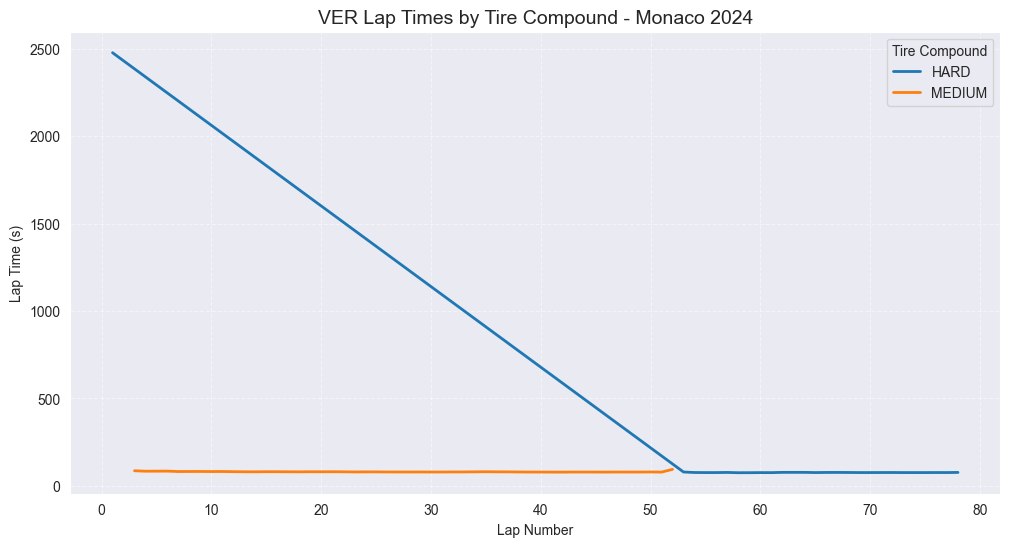

In [6]:
driver = 'VER'  # Change to your preferred driver code

driver_laps = laps.pick_drivers(driver)
plt.figure(figsize=(12, 6))
sns.lineplot(data=driver_laps, x='LapNumber', y='LapTimeSeconds', hue='Compound', linewidth=2)
plt.title(f"{driver} Lap Times by Tire Compound - Monaco 2024", fontsize=14)
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (s)")
plt.legend(title="Tire Compound")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


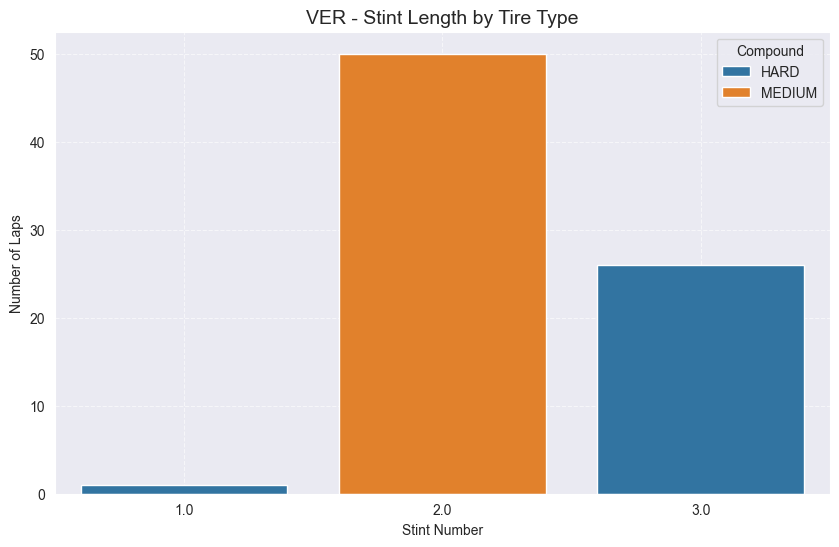

In [7]:
stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(['Driver', 'Stint', 'Compound']).count()
stints = stints.rename(columns={'LapNumber': 'StintLength'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=stints[stints['Driver'] == driver], x='Stint', y='StintLength', hue='Compound')
plt.title(f"{driver} - Stint Length by Tire Type", fontsize=14)
plt.ylabel("Number of Laps")
plt.xlabel("Stint Number")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\chara\AppData\Local\Temp\ipykernel_139916\585413100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_times, x='Compound', y='LapTimeSeconds',palette='viridis')


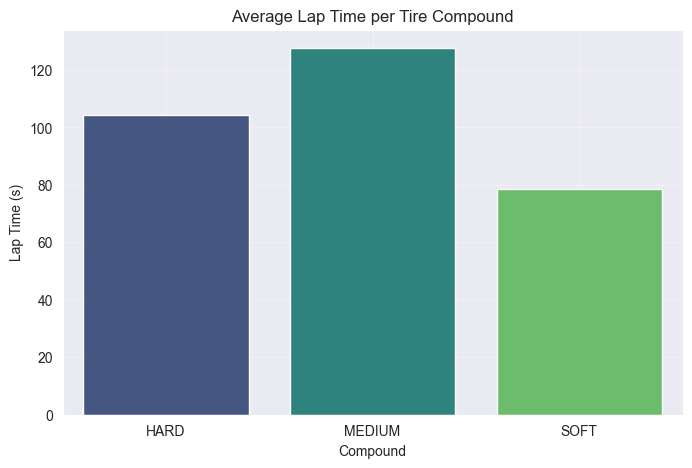

In [12]:
avg_times = laps.groupby(['Compound'])['LapTimeSeconds'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_times, x='Compound', y='LapTimeSeconds',palette='viridis')
plt.title("Average Lap Time per Tire Compound")
plt.ylabel("Lap Time (s)")
plt.xlabel("Compound")
plt.grid(True, alpha=0.3)
plt.show()


In [13]:
feature_data = laps[['Driver', 'LapNumber', 'Stint', 'Compound',
                     'TrackStatus', 'LapTimeSeconds', 'Sector1Time',
                     'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedFL']]

feature_data = feature_data.dropna()
feature_data.head()

,Driver,LapNumber,Stint,Compound,TrackStatus,LapTimeSeconds,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedFL
2,LEC,3.0,2.0,HARD,1,84.624,0 days 00:00:24.007000,0 days 00:00:38.235000,0 days 00:00:22.382000,199.0,250.0
3,LEC,4.0,2.0,HARD,1,82.625,0 days 00:00:21.892000,0 days 00:00:38.779000,0 days 00:00:21.954000,192.0,252.0
4,LEC,5.0,2.0,HARD,1,81.795,0 days 00:00:21.314000,0 days 00:00:38.513000,0 days 00:00:21.968000,196.0,253.0
5,LEC,6.0,2.0,HARD,1,81.145,0 days 00:00:21.568000,0 days 00:00:38.168000,0 days 00:00:21.409000,190.0,252.0
6,LEC,7.0,2.0,HARD,1,80.980,0 days 00:00:21.370000,0 days 00:00:38.056000,0 days 00:00:21.554000,193.0,253.0


In [16]:
import os

output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)   # ✅ auto-create if missing

feature_data.to_csv(os.path.join(output_dir, 'laps_cleaned.csv'), index=False)
print("✅ Cleaned lap data saved to", os.path.join(output_dir, 'laps_cleaned.csv'))


✅ Cleaned lap data saved to ../data/processed\laps_cleaned.csv
